<a href="https://colab.research.google.com/github/Beatriz-Maria/disciplina_prog/blob/main/Lista_Exercicios_1_resolucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1 - No começo era tudo uma grande massa sem vida
Lista de exercícios primeiro tópico

###Instale a biblioteca Biopython, importe para o seu programa a biblioteca *Biopython*, a biblioteca *pylab*  e os objetos *Seq, SeqIO* e *GC* da biblioteca *Biopython*.

In [3]:
!pip3 install biopython
import Bio
import pylab
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio import SeqIO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 7.7 MB/s 


###Faça o download do site do GenBank (NCBI - https://www.ncbi.nlm.nih.gov) do genoma Bacteriophage lambda (NC 001416), caso seja a versão compactada descompacte-a nesta sequência de comandos.

In [2]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/840/245/GCF_000840245.1_ViralProj14204/GCF_000840245.1_ViralProj14204_genomic.fna.gz
!gunzip GCF_000840245.1_ViralProj14204_genomic.fna.gz

--2022-07-04 17:06:10--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/840/245/GCF_000840245.1_ViralProj14204/GCF_000840245.1_ViralProj14204_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 165.112.9.230, 2607:f220:41e:250::12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15299 (15K) [application/x-gzip]
Saving to: ‘GCF_000840245.1_ViralProj14204_genomic.fna.gz’

GCF_000840245.1_Vir 100%[===================>]  14.94K  --.-KB/s    in 0.06s   

2022-07-04 17:06:10 (242 KB/s) - ‘GCF_000840245.1_ViralProj14204_genomic.fna.gz’ saved [15299/15299]



In [4]:
!cp /content/GCF_000840245.1_ViralProj14204_genomic.fna /content/GCF_000840245.1_ViralProj14204_genomic.fasta
arquivo = "/content/GCF_000840245.1_ViralProj14204_genomic.fasta"

###Carregue o genoma baixado utilizando o objeto *SeqIO*. Crie um objeto do tipo *Seq* que tenha o reverso (3'--5') do genoma lido.   

In [5]:
for rec in SeqIO.parse(arquivo, "fasta"):
  print(rec.description)
  my_seq = Seq(rec.seq)
print('A sequência do genoma do organismo é: ', my_seq)
my_seq_reverse = (my_seq[::-1])
print('A sequência reversa do genoma do organismo é: ', my_seq_reverse)

NC_001416.1 Enterobacteria phage lambda, complete genome
A sequência do genoma do organismo é:  GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGG

###Calcule e imprima as estatísticas dos GCs 

In [6]:
gc_value = []
for record in SeqIO.parse(arquivo, "fasta"):
  gc_value.append(GC(record.seq))
print(gc_value)

[49.85773782524432]


In [7]:
gc = GC(my_seq)
gc

49.85773782524432

### Faça a estatística das bases (A,C T, G) de todo o genoma NC 001416 dividido em 9.000 e 20.000 pbs e armazene os valores em duas listas distintas.

In [39]:
count_A = []
count_C = []
count_T = []
count_G = []
init = 0
a = int(len(record.seq)/9000)
for i in range(a):
  end = (int(((i+1)*(int(len(my_seq))/a)) -1))
  count_A.append(my_seq[init:end].count('A'))
  count_C.append(my_seq[init:end].count('C'))
  count_T.append(my_seq[init:end].count('T'))
  count_G.append(my_seq[init:end].count('G'))   
  init = end + 1

print('Contagem com divisão em 9000pbs')
print("Count_A: ", count_A)
print("Count_C: ", count_C)
print("Count_T: ", count_T)
print("Count_G: ", count_G)

Contagem com divisão em 9000pbs
Count_A:  [2209, 2184, 2651, 2489, 2801]
Count_C:  [2502, 2407, 2061, 2263, 2128]
Count_T:  [2007, 1948, 2870, 2845, 2316]
Count_G:  [2981, 3160, 2118, 2102, 2455]


In [34]:
count_A2 = []
count_C2 = []
count_T2 = []
count_G2 = []
init = 0
b = int(len(record.seq)/20000)
for i in range(b):
  end = (int(((i+1)*(int(len(my_seq))/b)) -1))
  count_A2.append(my_seq[init:end].count('A'))
  count_C2.append(my_seq[init:end].count('C'))
  count_T2.append(my_seq[init:end].count('T'))
  count_G2.append(my_seq[init:end].count('G'))   
  init = end + 1

print('Contagem com divisão em 20000pbs')
print("Count_A: ", count_A2)
print("Count_C: ", count_C2)
print("Count_T: ", count_T2)
print("Count_G: ", count_G2)

Contagem com divisão em 20000pbs
Count_A:  [5708, 6626]
Count_C:  [5954, 5408]
Count_T:  [5232, 6753]
Count_G:  [7356, 5463]


###Monte dois gráficos com as ocorrências das bases (A, C, T, G), o primeiro com a divisão de 9.000 pbs e o segundo com 20.000 pbs. 

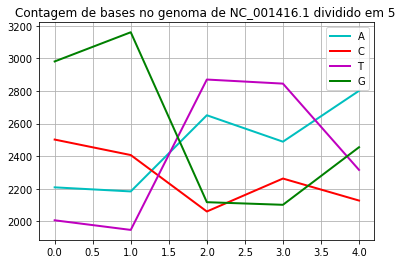

In [91]:
pylab.plot(count_A, 'c',label = 'A', linestyle = 'solid', linewidth = (2))
pylab.plot(count_C, 'r' , label = 'C', linestyle = 'solid', linewidth = 2)
pylab.plot(count_T, 'm', label = 'T', linestyle = 'solid', linewidth = 2)
pylab.plot(count_G, 'g', label = 'G', linestyle = 'solid', linewidth = 2)
pylab.grid(True)
pylab.legend(loc='upper right')
#pylab.xlim(-1, 5, 1)
pylab.title('Contagem de bases no genoma de %s dividido em %s ' % (rec.id, a))
pylab.legend()
pylab.show()

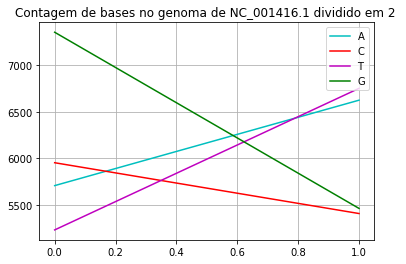

In [92]:
pylab.plot(count_A2, 'c' , label = 'A')
pylab.plot(count_C2, 'r' ,label = 'C')
pylab.plot(count_T2, 'm' ,label = 'T')
pylab.plot(count_G2, 'g' ,label = 'G')
pylab.grid(True)
pylab.title('Contagem de bases no genoma de %s dividido em %s ' % (rec.id, b))
pylab.legend()
pylab.legend(loc='upper right')
pylab.show()

###Monte uma lista com os triplets.

In [42]:
temp = []
my_seq_list = ['A','T','C','G']
for x in range (2):
  for base in my_seq_list:
    temp.append(base+'A')
    temp.append(base+'C')
    temp.append(base+'T')
    temp.append(base+'G')
  my_seq_list = temp
  temp = []
print(my_seq_list)

['AAA', 'AAC', 'AAT', 'AAG', 'ACA', 'ACC', 'ACT', 'ACG', 'ATA', 'ATC', 'ATT', 'ATG', 'AGA', 'AGC', 'AGT', 'AGG', 'TAA', 'TAC', 'TAT', 'TAG', 'TCA', 'TCC', 'TCT', 'TCG', 'TTA', 'TTC', 'TTT', 'TTG', 'TGA', 'TGC', 'TGT', 'TGG', 'CAA', 'CAC', 'CAT', 'CAG', 'CCA', 'CCC', 'CCT', 'CCG', 'CTA', 'CTC', 'CTT', 'CTG', 'CGA', 'CGC', 'CGT', 'CGG', 'GAA', 'GAC', 'GAT', 'GAG', 'GCA', 'GCC', 'GCT', 'GCG', 'GTA', 'GTC', 'GTT', 'GTG', 'GGA', 'GGC', 'GGT', 'GGG']


In [43]:
 print('Geração de uma lista com os triplets --> cada um gera um aminoácido, sendo 64 combinações possíveis')
 print(my_seq_list)


Geração de uma lista com os triplets --> cada um gera um aminoácido, sendo 64 combinações possíveis
['AAA', 'AAC', 'AAT', 'AAG', 'ACA', 'ACC', 'ACT', 'ACG', 'ATA', 'ATC', 'ATT', 'ATG', 'AGA', 'AGC', 'AGT', 'AGG', 'TAA', 'TAC', 'TAT', 'TAG', 'TCA', 'TCC', 'TCT', 'TCG', 'TTA', 'TTC', 'TTT', 'TTG', 'TGA', 'TGC', 'TGT', 'TGG', 'CAA', 'CAC', 'CAT', 'CAG', 'CCA', 'CCC', 'CCT', 'CCG', 'CTA', 'CTC', 'CTT', 'CTG', 'CGA', 'CGC', 'CGT', 'CGG', 'GAA', 'GAC', 'GAT', 'GAG', 'GCA', 'GCC', 'GCT', 'GCG', 'GTA', 'GTC', 'GTT', 'GTG', 'GGA', 'GGC', 'GGT', 'GGG']


###Faça a estatísticas de ocorrência dos triplets no genoma NC 001416 e guarde em uma lista.

In [44]:
count_aux = 0
count_trip = []
for trip in my_seq_list:
  count_aux = my_seq.count(trip)
  count_trip.append(trip + ':'+
str(count_aux))
print(count_trip)

['AAA:857', 'AAC:852', 'AAT:838', 'AAG:747', 'ACA:637', 'ACC:679', 'ACT:505', 'ACG:720', 'ATA:638', 'ATC:774', 'ATT:892', 'ATG:999', 'AGA:652', 'AGC:795', 'AGT:594', 'AGG:657', 'TAA:691', 'TAC:483', 'TAT:742', 'TAG:215', 'TCA:856', 'TCC:590', 'TCT:608', 'TCG:581', 'TTA:672', 'TTC:842', 'TTT:756', 'TTG:734', 'TGA:1091', 'TGC:1057', 'TGT:683', 'TGG:935', 'CAA:698', 'CAC:553', 'CAT:803', 'CAG:1132', 'CCA:675', 'CCC:348', 'CCT:525', 'CCG:884', 'CTA:286', 'CTC:451', 'CTT:602', 'CTG:1170', 'CGA:629', 'CGC:767', 'CGT:718', 'CGG:963', 'GAA:1048', 'GAC:655', 'GAT:915', 'GAG:607', 'GCA:1016', 'GCC:815', 'GCT:856', 'GCG:882', 'GTA:540', 'GTC:583', 'GTT:754', 'GTG:846', 'GGA:850', 'GGC:961', 'GGT:745', 'GGG:473']


In [45]:
#rodando apenas com os valores na lista
count_aux = 0
count_trip = []
for trip in my_seq_list:
  count_aux = my_seq.count(trip)
  count_trip.append((count_aux))
print(count_trip)

[857, 852, 838, 747, 637, 679, 505, 720, 638, 774, 892, 999, 652, 795, 594, 657, 691, 483, 742, 215, 856, 590, 608, 581, 672, 842, 756, 734, 1091, 1057, 683, 935, 698, 553, 803, 1132, 675, 348, 525, 884, 286, 451, 602, 1170, 629, 767, 718, 963, 1048, 655, 915, 607, 1016, 815, 856, 882, 540, 583, 754, 846, 850, 961, 745, 473]


###Monte um histograma das ocorrências dos triplets.

**DICA:** utilize a função pylab.hist no lugar da pylab.plot. Utilize os valores dentro da lista.

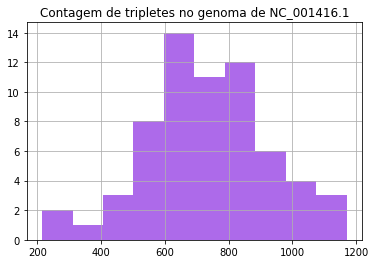

In [86]:
pylab.hist(count_trip, color = '#8A2BE2', alpha = 0.70)
pylab.grid(True)
pylab.title('Contagem de tripletes no genoma de %s' % rec.id, )
pylab.show()

